In [1]:
!pip install --user matplotlib pandas numpy scipy sklearn

    100% |████████████████████████████████| 15.0MB 64kB/s eta 0:00:01    66% |█████████████████████▎          | 10.0MB 1.0MB/s eta 0:00:05    73% |███████████████████████▍        | 11.0MB 1.2MB/s eta 0:00:04    87% |████████████████████████████    | 13.1MB 774kB/s eta 0:00:03
    100% |████████████████████████████████| 49.6MB 18kB/s eta 0:00:01    29% |█████████▍                      | 14.6MB 189kB/s eta 0:03:05    41% |█████████████▍                  | 20.8MB 412kB/s eta 0:01:10    42% |█████████████▊                  | 21.3MB 1.1MB/s eta 0:00:26    44% |██████████████▎                 | 22.1MB 478kB/s eta 0:00:58    55% |██████████████████              | 27.8MB 686kB/s eta 0:00:32    60% |███████████████████▌            | 30.2MB 1.0MB/s eta 0:00:19    61% |███████████████████▋            | 30.5MB 955kB/s eta 0:00:21    83% |██████████████████████████▋     | 41.2MB 651kB/s eta 0:00:13    84% |███████████████████████████     | 42.0MB 678kB/s eta 0:00:12    85% |████████████████████████

In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests 
from io import BytesIO

iris_url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
resp = requests.get(iris_url)
print(resp.content)

data=BytesIO(resp.content)

b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.4,1.5,0.2,setosa\n5,3

In [8]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

df=pd.read_csv(data)
print(df.head())
#print(df.head()['sepal_length'])
#print(df.iloc[0])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [9]:
target = df[df.columns[-1]]
target = target.astype('category')
numeric_data=df._get_numeric_data()    #確保資料都是數字
print(target.head())
print(" ")
print(numeric_data.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]
 
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [21]:
training_data, testing_data, training_label, testing_label, = train_test_split(numeric_data, target.cat.codes)
print(training_data.head())

     sepal_length  sepal_width  petal_length  petal_width
88            5.6          3.0           4.1          1.3
41            4.5          2.3           1.3          0.3
52            6.9          3.1           4.9          1.5
34            4.9          3.1           1.5          0.1
135           7.7          3.0           6.1          2.3


In [22]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(training_data, training_label)    #fit in  >> model
 
print(tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
predict_result = tree_model.predict(testing_data)     #predict
score_result = tree_model.predict_proba(testing_data)       #predict probability

print(predict_result[0:5])
print(score_result[0:5])

[0 2 2 2 0]
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In [29]:
matrix = confusion_matrix(testing_label, predict_result)  #wiki introduction
report = classification_report(testing_label, predict_result, target_names=target.cat.categories)
acc = accuracy_score(testing_label, predict_result) #準確度

print(matrix)    
                               #setosa    versicolor   virginica
                 #setosa
                 #versicolor
                 #virginica      
print("=======")
print(report)
print("=======")  #recall = category/support 
print(acc)

[[15  0  0]
 [ 0  8  0]
 [ 0  1 14]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.89      1.00      0.94         8
  virginica       1.00      0.93      0.97        15

avg / total       0.98      0.97      0.97        38

0.973684210526


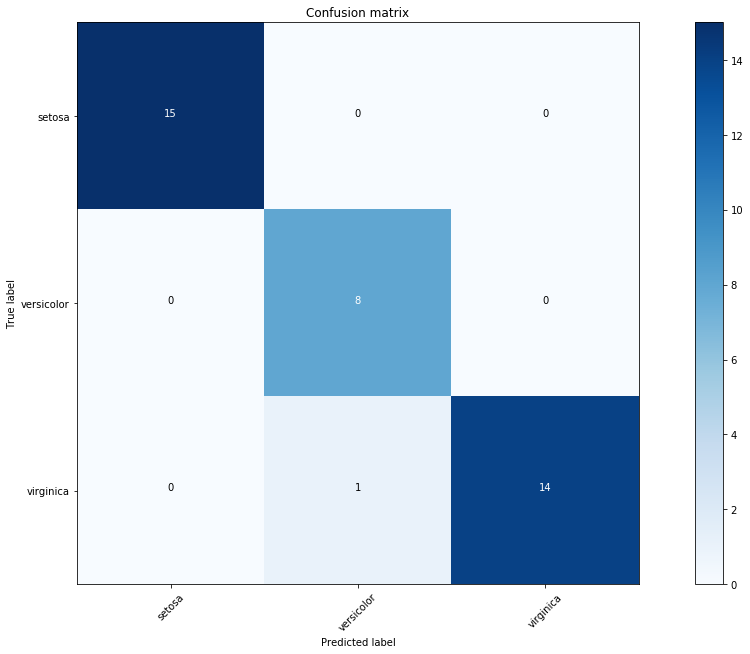

In [37]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(16,9))
plot_confusion_matrix(matrix, classes=target.cat.categories,
                      title='Confusion matrix')

plt.show()